# Data Science ODL Project: Assessment 2

ID: 201800626

## Case study

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives

The aim of this project is to utilise multiple datasets including historic insurance fraud datasets in order to generate a model which can be used to predict either the likelihood or the level of risk a customer poses to the insurance company when given details about the claim being made.

The objectives of this project are to create two models using different techniques to help answer the aim of the project and to present a report to the insurance company containing justifications for the techniques and models chosen along with an analysis on potential loss from using the model selected and how much the model will potentially cost due to error. 
The target loss for this project is a model with a balanced error rate of 5% or less and this model should be unbiased towards any type of categorisation.

This report will also contain visualisations to aid in the analysis of the data and to present the results in a more suitable format to the insurance company. 


###  b) Plan

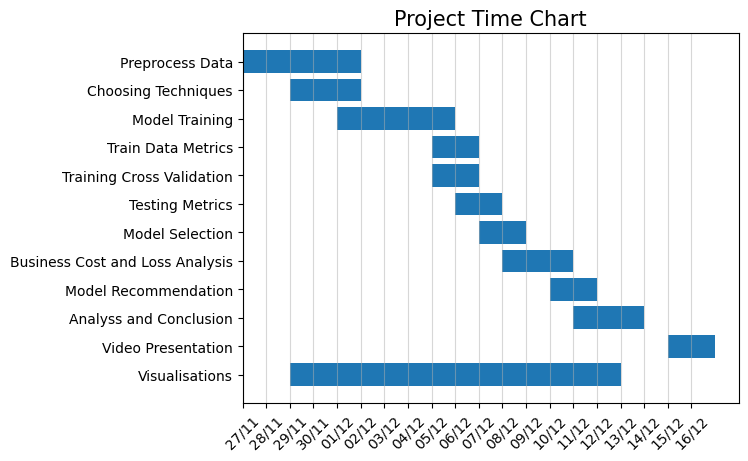

In [104]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

gantt_df = pd.DataFrame({'task': ['Preprocess Data', 'Choosing Techniques', 'Model Training', 'Train Data Metrics', 
                            'Training Cross Validation', 'Testing Metrics', 'Model Selection', 
                            'Business Cost and Loss Analysis', 'Model Recommendation', 
                            'Analyss and Conclusion', 'Video Presentation', "Visualisations"],
                  'start': pd.to_datetime(['27 Nov 2023', '29 Nov 2023', '01 Dec 2023', '05 Dec 2023', '05 Dec 2023', '06 Dec 2023', '07 Dec 2023', '08 Dec 2023', '10 Dec 2023', '11 Dec 2023', '15 Dec 2023', '29 Nov 2023']),
                  'end': pd.to_datetime(['01 Dec 2023', '01 Dec 2023', '05 Dec 2023', '06 Dec 2023', '06 Dec 2023', '07 Dec 2023', '08 Dec 2023', '10 Dec 2023', '11 Dec 2023', '13 Dec 2023', '16 Dec 2023', '12 Dec 2023']),
                  'completion_frac': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

gantt_df['days_to_start'] = (gantt_df['start'] - gantt_df['start'].min()).dt.days
gantt_df['days_to_end'] = (gantt_df['end'] - gantt_df['start'].min()).dt.days
gantt_df['task_duration'] = gantt_df['days_to_end'] - gantt_df['days_to_start'] + 1

fig, ax = plt.subplots()

plt.barh(y=gantt_df['task'], width=gantt_df['task_duration'], left=gantt_df['days_to_start'])
plt.title('Project Time Chart', fontsize=15)

total_days = (gantt_df['end'].max() - gantt_df['start'].min()).days

plt.gca().invert_yaxis() # Set in order of steps taken

# One tick for each day from the start until the end date + 1
xticks = np.arange(0, total_days +1, 1) 

# Start labels at the earliest date and end on latest end date +1
xticklabels = pd.date_range(start=gantt_df['start'].min(), periods=total_days + 1).strftime("%d/%m")

# Set the tick labels as dates
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45)

ax.xaxis.grid(True, alpha=0.5)
plt.show()

## 2. Understanding the case study (4 marks)

###  Case study analysis

1.	Create an unbiased model with an error rate of 5% or less.
This will be dealt with by testing out different types of models and using hyperparameter selection to ensure that each model is performing as efficiently as possible. This will also require the data to be pre-processed to remove noise and to remove any class imbalances if they affect the overall bias of the models. 

2.	 Analyse the results of the models and choose the best performing model.
Use various performance metrics to analyse different predictive behaviours of the models to allow for the best model to be selected which will meet the needs of the client by being unbiased and able to correctly identify potential fraud cases.

3.	Visualise the results of the testing of the models.
Create visualisations of different performance metrics and error rates to simply show the behaviour of the model and to aid in justifying the model choice. This will be performed on both the training and test data on the models to allow for an overall analysis on the model performance.

4.	Quantify the loss from using the model.
Create a pricing model from the datasets provided and use this to conduct analysis on the potential monetary loss incurred by using the model in regards to the error rate and use this to justify on if it is beneficial to use the model for the business. 




## 3. Pre-processing applied (20 marks)

###  a) Preparing the labels appropriately if necessary 

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the datasets to be used during the the project
claims = pd.read_csv('archive/TrainData/TrainData/Train_Claim.csv')
demographics = pd.read_csv('archive/TrainData/TrainData/Train_Demographics.csv')
policy = pd.read_csv('archive/TrainData/TrainData/Train_Policy.csv')
vehicles = pd.read_csv('archive/TrainData/TrainData/Train_Vehicle.csv')
fraud = pd.read_csv('archive/TrainData/TrainData/Traindata_with_Target.csv')

# Pivot vehicles dataset to remove duplicate entries from rows and turn them into distinct columns
vehicles = vehicles.pivot(index="CustomerID", columns='VehicleAttribute', values="VehicleAttributeDetails")

# Merge the datasets on the CustomerID which exists in all datasets
combined = claims.merge(demographics, how="left", on="CustomerID")
combined = combined.merge(policy, how="left", on="CustomerID" )
combined = combined.merge(vehicles, how="left", on="CustomerID")
# Merge the fraud dataset last to allow for the label of ReportedFraud to be the last column
combined = combined.merge(fraud, how="left", on="CustomerID")

# Split the data before removing / normalizing data to prevent data leakage
# stratify on the label to allow for imbalaced classes to be represented in proportion in the test set
train, test = train_test_split(combined, test_size=0.25, random_state=42, stratify=combined["ReportedFraud"])

train.head(10)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
4020,Cust14855,2015-01-21,Single Vehicle Collision,Side Collision,Total Loss,Police,State8,City7,Location 1830,13,...,250/1000,975,1280.19,199312,wife,Vehicle18740,Mercedes,RSX,1999,N
12898,Cust25572,2015-02-05,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State9,City3,Location 1217,12,...,250/500,1000,1358.83,1426796,not-in-family,Vehicle10110,Accura,RSX,2000,N
20567,Cust34976,2015-01-06,Single Vehicle Collision,Front Collision,Major Damage,Other,State8,City3,Location 1950,0,...,500/1000,518,1091.07,4024507,wife,Vehicle15935,Volkswagen,E400,2011,N
18186,Cust32071,2015-02-16,Multi-vehicle Collision,Front Collision,Minor Damage,Fire,State9,City7,Location 1773,21,...,100/300,2000,1125.54,0,husband,Vehicle23653,Audi,92x,2006,N
26228,Cust6522,2015-01-11,Multi-vehicle Collision,Side Collision,Major Damage,Other,State5,City1,Location 1204,22,...,250/300,1365,1319.58,2190159,wife,Vehicle9194,Dodge,F150,2005,Y
16315,Cust2979,2015-01-11,Multi-vehicle Collision,Rear Collision,Major Damage,Ambulance,State4,City3,Location 1849,23,...,100/300,1000,1253.35,0,other-relative,Vehicle23315,Mercedes,F150,2002,Y
14872,Cust28005,2015-01-17,Single Vehicle Collision,Front Collision,Total Loss,Police,State8,City4,Location 1961,9,...,500/1000,2000,1428.96,0,husband,Vehicle36421,Accura,MDX,1998,N
27991,Cust8852,2015-01-23,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,State9,City5,Location 1919,14,...,250/500,590,983.79,0,husband,Vehicle3656,Ford,Escape,2005,N
15587,Cust28900,2015-02-01,Single Vehicle Collision,Front Collision,Major Damage,Fire,State7,City1,Location 1949,8,...,100/300,663,1042.90,0,other-relative,Vehicle36538,Nissan,Pathfinder,2010,Y
1730,Cust1208,2015-02-25,Multi-vehicle Collision,Side Collision,Major Damage,Police,State8,City7,Location 1517,14,...,500/1000,500,1301.72,0,husband,Vehicle17157,Audi,A3,2005,N


,Count
ReportedFraud,
N,15788
Y,5839


Train class ratio: 2.703887651995205


,Count
ReportedFraud,
N,5263
Y,1946


Test class ratio: 2.7045220966084274


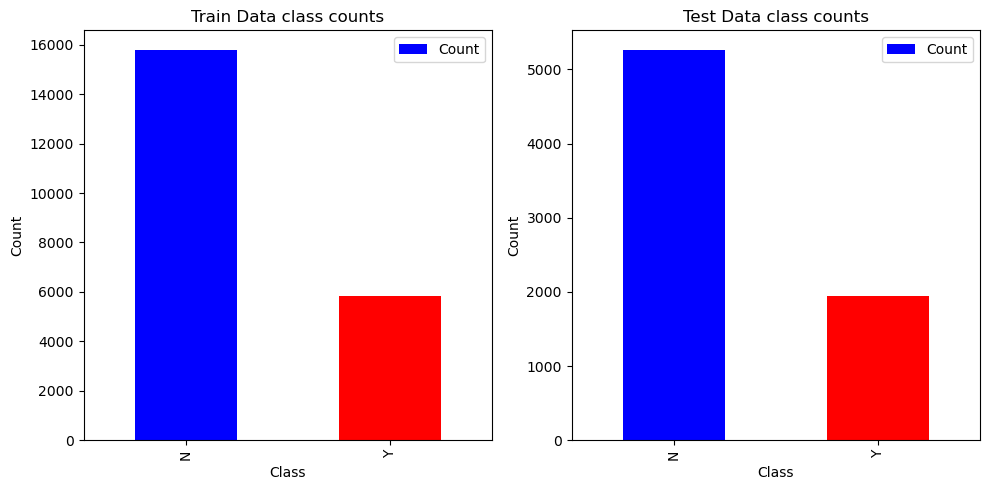

In [2]:
import matplotlib.pyplot as plt

train_counts = train[["ReportedFraud","CustomerID"]].groupby("ReportedFraud").count()
test_counts = test[["ReportedFraud", "CustomerID"]].groupby("ReportedFraud").count()

train_counts.rename(columns={"CustomerID": "Count"}, inplace=True)
test_counts.rename(columns={"CustomerID": "Count"}, inplace=True)

# Display the class splits for training and testing data to ensure stratify has worked correctly and that data
# is split in proportion to the classes.

display(train_counts)
print(f"Train class ratio: {train_counts.iloc[0,0] / train_counts.iloc[1,0]}")
display(test_counts)
print(f"Test class ratio: {test_counts.iloc[0,0] / test_counts.iloc[1,0]}")

train_counts.reset_index(inplace=True)
test_counts.reset_index(inplace=True)

# Create barcharts to show the class imbalance in the datasets
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_title("Train Data class counts")
ax[1].set_title("Test Data class counts")

train_colors = ["blue", "red"]

train_counts.plot(x="ReportedFraud", y="Count", kind="bar", 
                  ax=ax[0], color=["blue", "red"],
                 ylabel="Count", xlabel="Class")
test_counts.plot(x="ReportedFraud", y="Count", kind="bar", 
                 ax=ax[1], color=["blue", "red"],
                 ylabel="Count", xlabel="Class")

plt.tight_layout()

Figure 1. Class inbalance comparison on the training and test datasets for the ReportedFraud columns

In [3]:
# There is a class balance between non fraud cases and fraud cases as seen in the graphs above with a ratio
# of roughly 1:2.7 this will be addressed further down by both oversampling and undersampling

###  b) Removing synonymous and noisy attributes if necessary 


In [4]:
# Check if any attributes only contain 1 value 
train.nunique()

CustomerID                    21627
DateOfIncident                   70
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              4
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     25
NumberOfVehicles                  4
PropertyDamage                    3
BodilyInjuries                    3
Witnesses                         5
PoliceReport                      3
AmountOfTotalClaim            17549
AmountOfInjuryClaim           10582
AmountOfPropertyClaim         10392
AmountOfVehicleDamage         16317
InsuredAge                       45
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                     

<Axes: title={'center': 'Property Damage Value Counts'}, xlabel='Property damage types', ylabel='Count'>

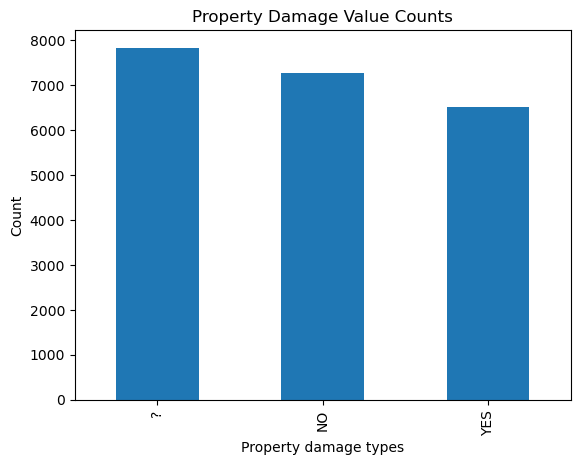

In [5]:
train["PropertyDamage"].value_counts()

# Plot the value counts of the PropertyDamage attribute to show there are a higher number of unknowns
# compared to the other values
train["PropertyDamage"].value_counts().plot(kind="bar", title="Property Damage Value Counts",
                                           xlabel="Property damage types", ylabel="Count")

Figure 2. Counts of the different values of PropertyDamage column in the train data

In [6]:
# Split the policy into 2 numerical columns to preserve importance of each part of the fraction
def split_policy(x):
    # Function to split the policy_combinedSingleLimit column based on numerator and denominator
    def split_fraction(fraction):
        try:
            numerator, denominator = fraction.split("/")
            return int(numerator), int(denominator)
        except ValueError:
            return None, None
        
    x["Policy_numerator"], x["Policy_denominator"] = zip(*x["Policy_CombinedSingleLimit"].apply(split_fraction))
    
    # Drop the original column as the data is now stored in 2 new columns
    x.drop(columns=["Policy_CombinedSingleLimit"], inplace=True)
    
    return x

def dropandconvert(x):
    x['DateOfIncident'] = pd.to_datetime(x['DateOfIncident'])
    x['DateOfPolicyCoverage'] = pd.to_datetime(x['DateOfPolicyCoverage'])
    x['DaysSinceIncident'] = x['DateOfPolicyCoverage'].dt.dayofyear - x['DateOfIncident'].dt.dayofyear.min()

    
    # Remove customerID as only used as identifier and country since it only has one unique value
    # AmountOfTotalClaim is made up from the property, vehicle and injury claim columns so can be removed
    # InsurancePolicyNumber and VehicleID would be unlikely to have an effect on the data as they 
    # are only used for identification purposes
    # VechicleYOM and VehicleModel are also unlikely to have an impact on the target and due to having many
    # possible values would lead to high dimensionality when encoded
    # PropertyDamage dropped due to having more missing values than either other class of values
    # DateOfIncident and DateOfPolicyCoverage removed due to being converted into DaysSinceIncident
    # Country removed due to only have 1 value
    x.drop(columns=["CustomerID", "Country", "InsurancePolicyNumber", "AmountOfTotalClaim", 
                    "VehicleID", "DateOfIncident",
                   "DateOfPolicyCoverage", "VehicleYOM", "PropertyDamage", "VehicleModel"], inplace=True)
        
    # Split the policy combined column into 2 new columns and drop the original
    x = split_policy(x)

    # Reduce InsuredZipCode to minimise the amount of categorical values whilst preserving as much data as possible
    # First digit is the region, second digit is sub-region and third is sorting district
    x["InsuredZipCode"] = x["InsuredZipCode"].astype(str).str[:2].astype(int)
    
    return x
    
train = dropandconvert(train)

In [7]:
pd.set_option("display.max_columns", None)
train.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,PoliceReport,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,ReportedFraud,DaysSinceIncident,Policy_numerator,Policy_denominator
4020,Single Vehicle Collision,Side Collision,Total Loss,Police,State8,City7,Location 1830,13,1,2,2,NO,15590,15590,69330,34,47,FEMALE,Masters,sales,dancing,0,-48300,145,State1,975,1280.19,199312,wife,Mercedes,N,31,250,1000
12898,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State9,City3,Location 1217,12,1,2,2,?,8995,8995,40804,47,47,MALE,JD,transport-moving,paintball,0,0,272,State1,1000,1358.83,1426796,not-in-family,Accura,N,166,250,500
20567,Single Vehicle Collision,Front Collision,Major Damage,Other,State8,City3,Location 1950,0,1,2,2,YES,6974,13755,62187,30,46,FEMALE,PhD,other-service,reading,27700,-72400,139,State3,518,1091.07,4024507,wife,Volkswagen,N,8,500,1000
18186,Multi-vehicle Collision,Front Collision,Minor Damage,Fire,State9,City7,Location 1773,21,3,1,2,YES,17602,17602,78793,61,61,FEMALE,High School,exec-managerial,skydiving,42900,-51000,446,State3,2000,1125.54,0,husband,Audi,N,148,100,300
26228,Multi-vehicle Collision,Side Collision,Major Damage,Other,State5,City1,Location 1204,22,3,0,0,?,7766,7766,40183,45,62,FEMALE,MD,machine-op-inspct,chess,38500,-30700,286,State3,1365,1319.58,2190159,wife,Dodge,Y,141,250,300


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21627 entries, 4020 to 10825
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TypeOfIncident         21627 non-null  object 
 1   TypeOfCollission       21627 non-null  object 
 2   SeverityOfIncident     21627 non-null  object 
 3   AuthoritiesContacted   19619 non-null  object 
 4   IncidentState          21627 non-null  object 
 5   IncidentCity           21627 non-null  object 
 6   IncidentAddress        21627 non-null  object 
 7   IncidentTime           21627 non-null  int64  
 8   NumberOfVehicles       21627 non-null  int64  
 9   BodilyInjuries         21627 non-null  int64  
 10  Witnesses              21627 non-null  object 
 11  PoliceReport           21627 non-null  object 
 12  AmountOfInjuryClaim    21627 non-null  int64  
 13  AmountOfPropertyClaim  21627 non-null  int64  
 14  AmountOfVehicleDamage  21627 non-null  int64  
 15  Insu

In [9]:
train.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,DaysSinceIncident,Policy_numerator,Policy_denominator
count,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,21627.000000,2.162700e+04,21627.000000,21627.000000,21627.000000
mean,11.789522,1.827623,0.985250,7332.758173,7273.222870,37723.511074,38.814167,49.775512,23139.996301,-24933.657003,203.195913,1114.754566,1255.854561,9.938033e+05,182.315300,274.654367,583.548342
std,6.157974,0.980843,0.782398,4403.183482,4353.803605,17910.304884,8.007944,7.227203,27692.651357,27915.964140,99.932644,546.360575,223.932127,1.983937e+06,95.948337,161.703095,288.229471
min,-5.000000,1.000000,0.000000,0.000000,0.000000,109.000000,20.000000,43.000000,0.000000,-111100.000000,1.000000,500.000000,-1.000000,-1.000000e+06,0.000000,100.000000,300.000000
25%,6.000000,1.000000,0.000000,4763.000000,4898.500000,32303.000000,33.000000,44.000000,0.000000,-50000.000000,126.000000,623.000000,1122.655000,0.000000e+00,102.000000,100.000000,300.000000
50%,12.000000,1.000000,1.000000,7162.000000,7040.000000,42427.000000,38.000000,46.000000,0.000000,0.000000,199.000000,1000.000000,1266.220000,0.000000e+00,185.000000,250.000000,500.000000
75%,17.000000,3.000000,2.000000,10543.000000,10253.000000,49468.500000,44.000000,60.000000,49300.000000,0.000000,267.000000,1624.000000,1396.085000,5.070155e+05,262.000000,500.000000,1000.000000
max,23.000000,4.000000,2.000000,21407.000000,23670.000000,79560.000000,64.000000,62.000000,100500.000000,0.000000,479.000000,2000.000000,2041.820000,1.000000e+07,365.000000,500.000000,1000.000000


###  c) Dealing with missing values if necessary 


In [10]:
display(train.columns[train.isnull().any()])
display(test.columns[test.isnull().any()])

print("Missing training data before processing AuthoritiesContacted: ", 
      train[train["AuthoritiesContacted"].isnull()==True].count()[0])
print("Missing training data before processing InsuredGender: ", 
      train[train["InsuredGender"].isnull()==True].count()[0])

Index(['AuthoritiesContacted', 'InsuredGender'], dtype='object')

Index(['AuthoritiesContacted', 'InsuredGender', 'Country'], dtype='object')

Missing training data before processing AuthoritiesContacted:  2008
Missing training data before processing InsuredGender:  23


In [11]:
train["VehicleMake"].value_counts()

VehicleMake
Saab          1817
Suburu        1722
Nissan        1709
Dodge         1702
Chevrolet     1635
Ford          1596
Accura        1591
BMW           1537
Toyota        1506
Jeep          1472
Volkswagen    1461
Audi          1451
Mercedes      1263
Honda         1127
???             38
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

# List of encoders to apply same transform onto the test data from the train data to ensure attributes
# are encoded as the same values
encoders = {}

def convertandreplace(x, test=False):  
    ordinal_mappings = {
        "InsuredEducationLevel": {"High School": 1, "College": 2, "Associate": 3, "Masters": 4, "JD": 5, "MD": 6, "PhD": 7},
        "SeverityOfIncident": {"Trivial Damage": 1, "Minor Damage": 2, "Major Damage": 3, "Total Loss": 4}
    }

    # Define lists of columns depending on which need converting to categorical encoding, this is used
    # as these attributes either only have binary values or having a high value range and helps prevent
    # the curse of dimensionality
    categorical_convert = ["InsuredOccupation", "InsuredHobbies", "IncidentState", "IncidentCity", "IncidentAddress",
                           "ReportedFraud", "InsuredZipCode",
                          "InsuredRelationship","VehicleMake"]

    # One hot encoding used for attributes with fewer value ranges which do not have an order
    one_hot_encode = ["InsurancePolicyState", "AuthoritiesContacted", "PoliceReport", "InsuredGender", "TypeOfIncident",
                     "TypeOfCollission"]

    # Replace missing values in columns with non-default missing values that cannot be checked by the dataframe
    def replaceMissing(x):
        x["TypeOfCollission"].replace("?", train["TypeOfCollission"].mode()[0], inplace=True)
        x["PoliceReport"].replace("?", train["PoliceReport"].mode()[0], inplace=True)
        x["Witnesses"].replace("MISSINGVALUE", 0, inplace=True)
        x["Witnesses"] = pd.to_numeric(x["Witnesses"], errors="coerce")
        x["Witnesses"].replace(0, train["Witnesses"].mean(), inplace=True)
        x["Witnesses"].fillna(train["Witnesses"].mean(), inplace=True)
        x["VehicleMake"].dropna(inplace=True)

        return x

    def encode_columns(x, columns, test=False):
        # Add new encoded column and delete original column after and only transform when test data passed
        for column in columns:
            if not test:
                encoders[column] = LabelEncoder()
                x[column+"_encoded"] = encoders[column].fit_transform(x[column])
            else:
                x[column+"_encoded"] = encoders[column].transform(x[column])
            x[column+"_encoded"] = x[column+"_encoded"].astype("category")
            x.drop(columns=[column], inplace=True)

        return x

    # Takes a list of columns to replace with the mode of the column (used for categorical columns)
    # If replace is specified it will replace the matching entries in the column with the mean
    def fillMissing(dataset, columns, replace=None):
        for col in columns:
            dataset[col].fillna(dataset[col].mode(), inplace=True)
            if replace:
                dataset[col].replace(replace, dataset[col].mean())
        return dataset

    # Applies the ordinal mappings to the dataframe passed in
    def apply_ordinal_encodings(x, mappings):
        for column, mapping in mappings.items():
            x[column + "_encoded"] = x[column].map(mapping)
            x.drop(column, axis=1, inplace=True)
        return x

    x = replaceMissing(x)
    
    x = fillMissing(x, ["AuthoritiesContacted", "InsuredGender"])
    x = fillMissing(x, ["PolicyAnnualPremium"], -1)

    # Ordinal encoding for education type
    x = apply_ordinal_encodings(x, ordinal_mappings)

    # One hot encoding for variables with low variance of values
    x = pd.get_dummies(x, columns=one_hot_encode, drop_first=True)

    # Encode categorical columns only after all missing entries are deleted to ensure missing values are not encoded
    x = encode_columns(x, categorical_convert, test)
    
    return x

train_encoded = convertandreplace(train)

In [13]:
train_encoded.head()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,DaysSinceIncident,Policy_numerator,Policy_denominator,InsuredEducationLevel_encoded,SeverityOfIncident_encoded,InsurancePolicyState_State2,InsurancePolicyState_State3,AuthoritiesContacted_Fire,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,InsuredGender_MALE,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,InsuredOccupation_encoded,InsuredHobbies_encoded,IncidentState_encoded,IncidentCity_encoded,IncidentAddress_encoded,ReportedFraud_encoded,InsuredZipCode_encoded,InsuredRelationship_encoded,VehicleMake_encoded
4020,13,1,2,2.00000,15590,15590,69330,34,0,-48300,145,975,1280.19,199312,31,250,1000,4,4,False,False,False,False,True,False,False,False,True,False,False,True,11,7,5,6,752,0,4,5,9
12898,12,1,2,2.00000,8995,8995,40804,47,0,0,272,1000,1358.83,1426796,166,250,500,5,2,False,False,True,False,False,False,True,False,True,False,False,False,13,13,6,2,196,0,4,1,1
20567,0,1,2,2.00000,6974,13755,62187,30,27700,-72400,139,518,1091.07,4024507,8,500,1000,7,3,False,True,False,True,False,True,False,False,True,False,False,False,7,15,5,2,860,0,3,5,14
18186,21,3,1,2.00000,17602,17602,78793,61,42900,-51000,446,2000,1125.54,0,148,100,300,1,2,False,True,True,False,False,True,False,False,False,False,False,False,3,16,6,6,698,0,6,0,2
26228,22,3,0,1.48777,7766,7766,40183,45,38500,-30700,286,1365,1319.58,2190159,141,250,300,6,3,False,True,False,True,False,False,False,False,False,False,False,True,6,5,2,0,185,1,7,5,5


In [14]:
# Only useful on numeric attributes and will not be useful on categorical attributes.
matrix = train_encoded.corr(method="pearson")

# Threshold for displaying correlation
threshold = 0.1

# Create mask for correlations above threshold
mask = abs(matrix) > threshold

# Set diagonal 1's to False
np.fill_diagonal(mask.values, False)

# Apply mask
filtered_corr = matrix[mask]

# Remove NaN values (all below threshold)
filtered_corr = filtered_corr.dropna(axis=0, how="all").dropna(axis=1, how="all")

# Although customer loyalty period and customer age are highly correlated
# they capture different aspects of the individual so both should be kept
display(filtered_corr)

,IncidentTime,NumberOfVehicles,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CustomerLoyaltyPeriod,Policy_numerator,Policy_denominator,SeverityOfIncident_encoded,InsurancePolicyState_State2,InsurancePolicyState_State3,AuthoritiesContacted_Fire,AuthoritiesContacted_Other,AuthoritiesContacted_Police,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,ReportedFraud_encoded
IncidentTime,NaN,0.173405,0.227870,0.216257,0.271600,0.111307,NaN,NaN,NaN,0.218438,NaN,NaN,NaN,NaN,NaN,-0.196170,NaN,-0.215846,-0.165821,0.144287,NaN
NumberOfVehicles,0.173405,NaN,0.249654,0.229938,0.286093,NaN,NaN,NaN,NaN,0.230781,NaN,NaN,NaN,NaN,NaN,-0.255455,-0.587551,-0.264665,-0.182524,0.167491,NaN
AmountOfInjuryClaim,0.227870,0.249654,NaN,0.619800,0.761702,NaN,NaN,NaN,NaN,0.394742,NaN,NaN,0.178063,0.200331,-0.146680,-0.452653,0.280114,-0.468855,-0.346589,0.179945,NaN
AmountOfPropertyClaim,0.216257,0.229938,0.619800,NaN,0.776800,NaN,NaN,NaN,NaN,0.411620,NaN,NaN,0.137255,0.185250,-0.119264,-0.454252,0.294241,-0.469758,-0.358694,0.190731,0.134627
AmountOfVehicleDamage,0.271600,0.286093,0.761702,0.776800,NaN,NaN,NaN,NaN,NaN,0.519299,NaN,NaN,0.210302,0.231749,-0.161595,-0.571542,0.378157,-0.589471,-0.450294,0.241663,0.166551
InsuredAge,0.111307,NaN,NaN,NaN,NaN,NaN,0.933812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerLoyaltyPeriod,NaN,NaN,NaN,NaN,NaN,0.933812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Policy_numerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Policy_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeverityOfIncident_encoded,0.218438,0.230781,0.394742,0.411620,0.519299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119738,0.167724,-0.116342,-0.392839,0.218778,-0.396629,-0.293579,0.175774,NaN


###  d) Rescaling if necessary if necessary 


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

scaler = None

def scale(x, scaler=None):
    # Tree models are scalre-invariant and so do not require scaling for continuous variables. However, knn
    # models are sensitive to features of different scales and scaling must be performed in order for this model
    # to work efficiently 
    # As this makes no difference to tree models the scaled data will be used for both below models. 

    unscaled = x.copy(True)

    # Identify continuous columns
    cont_cols = x.select_dtypes(include=["int64", "float64"]).columns

    if not scaler:
        # Initialise Min Max Scaler
        scaler = MinMaxScaler()

        # Scale only the continuous columns
        x[cont_cols] = scaler.fit_transform(x[cont_cols])
        
    else:
        # Test data needs to be transformed with the same scaler trained on the train data to eliminate bias
        x[cont_cols] = scaler.transform(x[cont_cols])
        
    return x, scaler

train_encoded, scaler = scale(train_encoded, scaler)

# Check variables have been scaled correctly between 0 and 1
display(train_encoded.head())

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,DaysSinceIncident,Policy_numerator,Policy_denominator,InsuredEducationLevel_encoded,SeverityOfIncident_encoded,InsurancePolicyState_State2,InsurancePolicyState_State3,AuthoritiesContacted_Fire,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,InsuredGender_MALE,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,InsuredOccupation_encoded,InsuredHobbies_encoded,IncidentState_encoded,IncidentCity_encoded,IncidentAddress_encoded,ReportedFraud_encoded,InsuredZipCode_encoded,InsuredRelationship_encoded,VehicleMake_encoded
4020,0.642857,0.000000,1.0,0.500000,0.728266,0.658640,0.871241,0.318182,0.000000,0.565257,0.301255,0.316667,0.627167,0.109028,31,0.375,1.000000,0.500000,1.000000,False,False,False,False,True,False,False,False,True,False,False,True,11,7,5,6,752,0,4,5,9
12898,0.607143,0.000000,1.0,0.500000,0.420190,0.380017,0.512202,0.613636,0.000000,1.000000,0.566946,0.333333,0.665663,0.220618,166,0.375,0.285714,0.666667,0.333333,False,False,True,False,False,False,True,False,True,False,False,False,13,13,6,2,196,0,4,1,1
20567,0.178571,0.000000,1.0,0.500000,0.325781,0.581115,0.781337,0.227273,0.275622,0.348335,0.288703,0.012000,0.534589,0.456773,8,1.000,1.000000,1.000000,0.666667,False,True,False,True,False,True,False,False,True,False,False,False,7,15,5,2,860,0,3,5,14
18186,0.928571,0.666667,0.5,0.500000,0.822254,0.743642,0.990346,0.931818,0.426866,0.540954,0.930962,1.000000,0.551463,0.090909,148,0.000,0.000000,0.000000,0.333333,False,True,True,False,False,True,False,False,False,False,False,False,3,16,6,6,698,0,6,0,2
26228,0.964286,0.666667,0.0,0.243885,0.362779,0.328095,0.504386,0.568182,0.383085,0.723672,0.596234,0.576667,0.646450,0.290014,141,0.375,0.000000,0.833333,0.666667,False,True,False,True,False,False,False,False,False,False,False,True,6,5,2,0,185,1,7,5,5


### e) Other

In [16]:
def split_labels(x):
    # Split the labels from the datasets now that all dropping has been performed 
    labels = x["ReportedFraud_encoded"]
    data = x.drop("ReportedFraud_encoded", axis=1)
    return data, labels
    
train_data, train_labels = split_labels(train_encoded)

In [17]:
from sklearn.utils import resample

# Balance the classes

# Split the fraud and non fraud data
not_fraud = train_encoded[train_encoded["ReportedFraud_encoded"]==0]
fraud = train_encoded[train_encoded["ReportedFraud_encoded"]==1]

# Get the max samples to create datasets of this size in oversampling
n_samples = max(len(not_fraud), len(fraud))

# Oversampling with replacement used on the minority class to ensure class balance
nfraud_resample = resample(not_fraud, replace=False, n_samples=n_samples, random_state=42)
fraud_resample = resample(fraud, replace=True, n_samples=n_samples, random_state=42)

# Rejoin the data from both new samples
oversample_train = pd.concat([nfraud_resample, fraud_resample])

# Split into labels and data
oversample_train_labels = oversample_train["ReportedFraud_encoded"]
oversample_train_data = oversample_train.drop("ReportedFraud_encoded", axis=1)


# Also create balanced classes using undersampling instead of oversampling to test which approach will have better accuracy
under_n = min(len(not_fraud), len(fraud))

# Undersampling used to reduce the majority class to the size of the minority class
under_nfraud = resample(not_fraud, replace=False, n_samples=under_n, random_state=42)
under_fraud = resample(fraud, replace=False, n_samples=under_n, random_state=42)

# Rejoin the data from both new samples
undersample_train = pd.concat([under_nfraud, under_fraud])

# Split into labels and data
undersample_train_labels = undersample_train["ReportedFraud_encoded"]
undersample_train_data = undersample_train.drop("ReportedFraud_encoded", axis=1)

### f) Feature Selection

In [18]:
# Sequential feature selection used in a forward pass to select the best attributes which contribute to the 
# model performance. This will return the data from these features which will be used when testing the model in both 
# training and testing. Test data was transformed without fitting to use the same features as the train data.
def selectfeatures(model, train_data, train_labels, test_data, scoring=None, jobs=1):
    sfs = SequentialFeatureSelector(model, scoring=scoring, n_jobs=jobs)
    new_data = sfs.fit_transform(train_data, train_labels)
    new_test = sfs.transform(test_data)
    
    return new_data, new_test


### g) Apply techniques to test data

In [19]:
# Apply all of the above processed to the test data while using the encoders and scalers used from the train data
# to avoid data leakage
def preprocess(x, scaler=None, test=False):
    x = dropandconvert(x)
    x = convertandreplace(x, test)
    x, scaler = scale(x, scaler)
    data, labels = split_labels(x)
    
    return data, labels

test_data, test_labels = preprocess(test, scaler, True)

## 4. Technique 1 (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

As there are a lot of attributes within this dataset with most of them containing a wide range of values, the K-nearest neighbors model was chosen as this is very suitable for datasets with a wide range of attributes and it would allow the model to classify datapoints based on the other nearest datapoints to it from the training set. If the values of these datapoints are similar for each class then it will be able to obtain a good accuracy on classifying new data by comparing it with the nearest classes of other datapoints. 

KNN models can also handle interacting attributes which have more predictive power when they are in combination with each other as the proximity is measured based on all attributes.

This model is also simple for finding the best hyperparameters as the biggest factors in this model are how many neighbors are being used for classification and if the distance is uniform or weighted based on datapoint distance both of which will be tested during the hyperparameter tuning.

The simplicity of this model makes it fast to train and predict datapoints and this also aids in finding the best hyperparameters as more models can be tested in a smaller timeframe compared to other models.

KNN models require feature scaling which has been performed above as it is very sensitive to larger values and also requires balanced datasets to be used as an unbalanced dataset can easily lead to the model choosing the majority class as most of the neighbors since it has more appearances within the dataset. 
(Tan et al, 2019, p412-414)

![KnnTrainSchematic](KnnTrainSchematic.drawio.png)

![KnnExample](KnnExample.drawio.png)

### b) Setting hyper parameters with rationale

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline

# Transformation needs to be performed to make the data contiguous to allow for the predict to be performed
test_contig = np.ascontiguousarray(test_data)

# 3 neighbors chosen as a starting point to allow for quicker computation due to a smaller amount of neighbor
# calculations and to test if the training data can be accuractly classified using this method. 
knn = KNeighborsClassifier(n_neighbors=3)

# Perform sequential feature selection to generate new data with only the most useful attributes which contribute
# to the balanced accuracy score
new_under_data, new_under_test  = selectfeatures(knn, undersample_train_data, undersample_train_labels, 
                                                 test_contig, scoring="balanced_accuracy", jobs=-1)

C:\Users\Pete\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


In [21]:
# Perform sequential feature selection to generate new data with only the most useful attributes which contribute
# to the balanced accuracy score
new_over_data, new_over_test  = selectfeatures(knn, oversample_train_data, oversample_train_labels, 
                                                 test_contig, scoring="balanced_accuracy", jobs=-1)

C:\Users\Pete\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


### c) Optimising hyper parameters


In [22]:
from sklearn.model_selection import GridSearchCV

# Test combinations of different neighbor amounts and different weighted calculations for neighbors chosen
params = {"n_neighbors": [2,3,4,5,6,7,8,9,10,12,15],
         "weights": ["uniform", "distance"]}

# Default cross-validation of 5 used within the GridSearch class
clf_knn = GridSearchCV(knn, params, refit=True, verbose=2, n_jobs=-1)
clf_knn.fit(new_under_data, undersample_train_labels)
clf_knn_under = clf_knn.best_estimator_

# Fit to both undersampled and oversampled data to allow for testing to see which is better for this model
clf_knn.fit(new_over_data, oversample_train_labels)
clf_knn_over = clf_knn.best_estimator_

Fitting 5 folds for each of 22 candidates, totalling 110 fits
Fitting 5 folds for each of 22 candidates, totalling 110 fits


### d) Performance metrics for training

In [23]:
# Test the training set for balanced accuracy score to see how accurate the total model is by getting the 
# average recall obtained on each class in the dataset
knn_preds_under = clf_knn_under.predict(new_under_data)
knn_under_balanced_acc = balanced_accuracy_score(undersample_train_labels, knn_preds_under)

knn_preds_over = clf_knn_over.predict(new_over_data)
knn_over_balanced_acc = balanced_accuracy_score(oversample_train_labels, knn_preds_over)

# The oversampled KNN model has overfitted to the training data and so it would be reasonable to expect worse
# performance on the testing data
print(f"Knn Undersample Balanced Accuracy: {knn_under_balanced_acc}")
print(f"Knn Oversample Balanced Accuracy: {knn_over_balanced_acc}")

Knn Undersample Balanced Accuracy: 0.9152252097961979
Knn Oversample Balanced Accuracy: 1.0


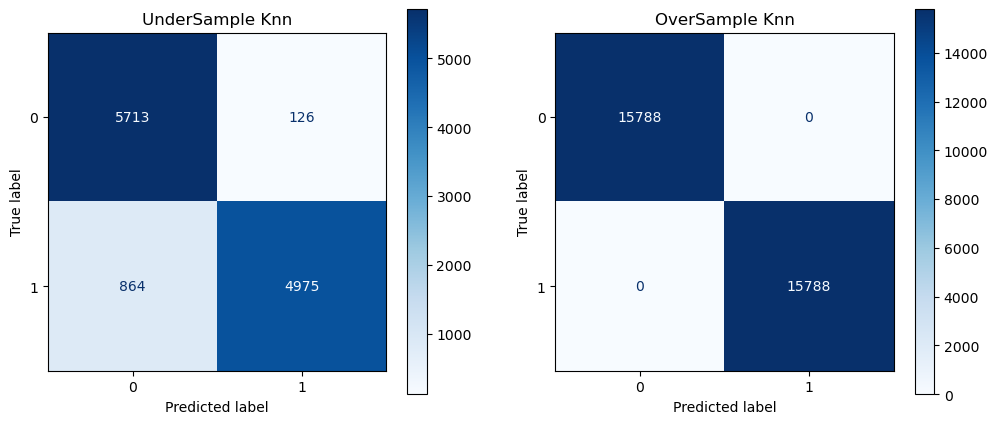

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Plot a confusion matrix to see which classes were being misclassified the most.
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_title("UnderSample Knn")
disp_under = ConfusionMatrixDisplay.from_estimator(
    clf_knn_under,
    new_under_data,
    undersample_train_labels,
    cmap=plt.cm.Blues,
    ax=ax[0]
)

ax[1].set_title("OverSample Knn")
disp_over = ConfusionMatrixDisplay.from_estimator(
    clf_knn_over,
    new_over_data,
    oversample_train_labels,
    cmap=plt.cm.Blues,
    ax=ax[1]
)

# The oversampled data appears to have correctly classified all of the training data which could point to the model
# having overfitted to the data, whereas the undersampled data is mostly misclaffisying with false negatives

Figure 3. Confusin matrix comparison for KNN models trained on undersampled and oversampled training data respectively

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# F1 score to show the harmonic mean between precision and recall 
knn_under_f1 = f1_score(undersample_train_labels, knn_preds_under)
knn_over_f1 = f1_score(oversample_train_labels, knn_preds_over)

# Recall score to show how many fraud cases were correctly predicted in the predictions on the training set
knn_under_recall = recall_score(undersample_train_labels, knn_preds_under)
knn_over_recall = recall_score(oversample_train_labels, knn_preds_over)

print(f"Knn under - F1 Score: {knn_under_f1}, Recall Score: {knn_under_recall}, Balanced Accuracy: {knn_under_balanced_acc}")
print(f"Knn over - F1 Score: {knn_over_f1}, Recall Score: {knn_over_recall}, Balanced Accuracy: {knn_over_balanced_acc}")

Knn under - F1 Score: 0.9095063985374772, Recall Score: 0.8520294570988183, Balanced Accuracy: 0.9152252097961979
Knn over - F1 Score: 1.0, Recall Score: 1.0, Balanced Accuracy: 1.0


## 5. Technique 2 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

The AdaBoostClassifier (ADA) was chosen as the second technique as the target classes in this dataset are highly imbalanced which is typical for fraud datasets. ADA handles imbalanced data well as it focuses on misclassified instances in each iteration to amend the weights in the weak learners to identify the minority class more correctly. 

Furthermore, through the ensemble of GradientBoosted Trees this model can perform implicit feature selection concentrating on features which are the most informative for the classification problem given. 

ADA also often has high accuracy values on classification problems by combining multiple weak hypotheses into a single stronger one which can find subtle patterns in the datasets and is less prone to overfitting due to the gradual weight adjustment process which is crucial in fraud detection datasets as new unseen patterns may emerge. 

While AdaBoost is robust, it can be sensitive to noisy data and outliers in the data, so it is important to ensure noisy data has been handled appropriately before using these models. 

AdaBoost is also well suited for environments such as fraud data as through the iterations it can continuously evolve to focus on new patterns found in the data.
(Tan et al, 2019, p510-512)

![ADASchematic.drawio.png](ADASchematic.drawio.png)

### b) Setting hyper parameters with rationale

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Start with a small depth tree with a small number of iterations to quickly get an 
# estimate on the rough accuracy results from the model
# will also set the l2 regularization rate and the class weights in the optimise stage 
# to allow for balanced class rates to be tested and different regularizations to be applied to weights
gradient_boost = HistGradientBoostingClassifier(max_depth=3, max_iter=100)

gradient_boost.fit(undersample_train_data, undersample_train_labels)
hgbc_unoptimised_preds_under = gradient_boost.predict(undersample_train_data)
balanced_accuracy_score(undersample_train_labels, hgbc_unoptimised_preds_under)

0.8182908032197294

In [27]:
gradient_boost = HistGradientBoostingClassifier(max_depth=3, max_iter=100)

gradient_boost.fit(oversample_train_data, oversample_train_labels)
hgbc_unoptimised_preds_over = gradient_boost.predict(oversample_train_data)
balanced_accuracy_score(oversample_train_labels, hgbc_unoptimised_preds_over)

0.8151127438560932

### c) Optimising hyper parameters


In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Parameters will be tuned using GridSearchCV to allow for each parameter combination to be checked
# Due to the sensitivity of this model and the training time taken, it is not possible to try a high number of combinations
# and as such it may be possible to further improve the model by tweaking these parameters more

params = {"max_depth": [3,4,5,8,9,10,20,30,50,None],
         "max_iter": [100,200,300],
         "l2_regularization": [0,0.1],
         "class_weight": [None, "balanced"]}

HGBC_under = HistGradientBoostingClassifier()
clf_HGBC_under = GridSearchCV(HGBC_under, params, scoring="balanced_accuracy", n_jobs=6)
clf_HGBC_under.fit(undersample_train_data, undersample_train_labels)
HGBC_under_preds = clf_HGBC_under.predict(undersample_train_data)
balanced_accuracy_score(undersample_train_labels, HGBC_under_preds)

0.9298681281041274

In [107]:
HGBC_over = HistGradientBoostingClassifier()
clf_HGBC_over = GridSearchCV(HGBC_over, params, scoring="balanced_accuracy", n_jobs=6)
clf_HGBC_over.fit(oversample_train_data, oversample_train_labels)
HGBC_over_preds = clf_HGBC_over.predict(oversample_train_data)
balanced_accuracy_score(oversample_train_labels, HGBC_over_preds)

0.9668419052444894

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Run another GridSearch to tune the number of estimators for the AdaBoostClassifier

estimator_params = {"n_estimators": [20,30,50,100,200],
                    "learning_rate": [1.0,0.9,0.8]}

ada_under = AdaBoostClassifier(clf_HGBC_under.best_estimator_)

clf_ada_under = GridSearchCV(ada_under, estimator_params, scoring="balanced_accuracy", verbose=2, n_jobs=-1)
clf_ada_under.fit(undersample_train_data, undersample_train_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.1,
                                                                                   max_depth=9,
                                                                                   max_iter=300)),
             n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.9, 0.8],
                         'n_estimators': [20, 30, 50, 100, 200]},
             scoring='balanced_accuracy', verbose=2)

In [31]:
ada_over = AdaBoostClassifier(clf_HGBC_over.best_estimator_)

clf_ada_over = GridSearchCV(ada_under, estimator_params, scoring="balanced_accuracy", verbose=2, n_jobs=-1)
clf_ada_over.fit(oversample_train_data, oversample_train_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=HistGradientBoostingClassifier(l2_regularization=0.1,
                                                                                   max_depth=9,
                                                                                   max_iter=300)),
             n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.9, 0.8],
                         'n_estimators': [20, 30, 50, 100, 200]},
             scoring='balanced_accuracy', verbose=2)

### d) Performance metrics for training

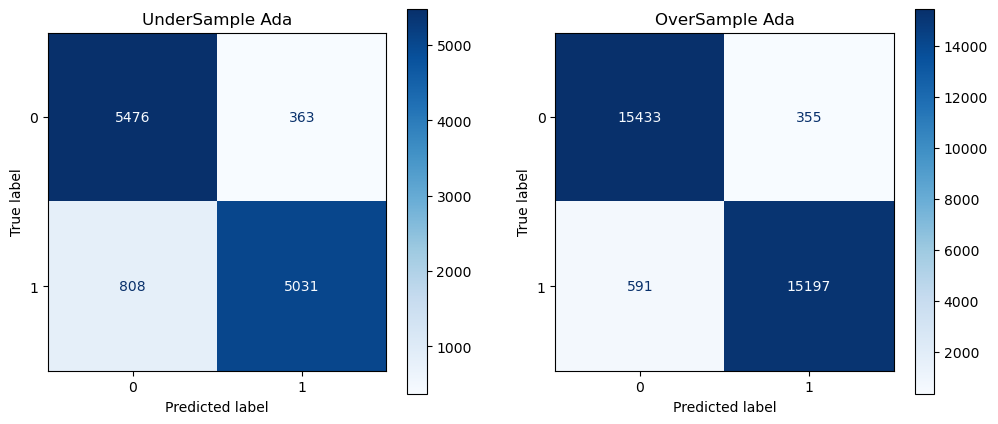

In [32]:
# Plot confusion matrix for training data on both undersampled and oversampled AdaBoost models
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_title("UnderSample Ada")
disp_under = ConfusionMatrixDisplay.from_estimator(
    clf_ada_under.best_estimator_,
    undersample_train_data,
    undersample_train_labels,
    cmap=plt.cm.Blues,
    ax=ax[0]
)

ax[1].set_title("OverSample Ada")
disp_over = ConfusionMatrixDisplay.from_estimator(
    clf_ada_over.best_estimator_,
    oversample_train_data,
    oversample_train_labels,
    cmap=plt.cm.Blues,
    ax=ax[1]
)

Figure 4. Confusion matrix comparison of ADA model trained on undersampled and oversampled training data respectivly

In [33]:
ada_under_preds = clf_ada_under.best_estimator_.predict(undersample_train_data)
ada_over_preds = clf_ada_over.best_estimator_.predict(oversample_train_data)

ada_under_balanced_acc = balanced_accuracy_score(undersample_train_labels, ada_under_preds)
ada_over_balanced_acc = balanced_accuracy_score(oversample_train_labels, ada_over_preds)

# F1 score to show the harmonic mean between precision and recall 
ada_under_f1 = f1_score(undersample_train_labels, ada_under_preds)
ada_over_f1 = f1_score(oversample_train_labels, ada_over_preds)

# Recall score to show how many fraud cases were correctly predicted in the predictions on the training set
ada_under_recall = recall_score(undersample_train_labels, ada_under_preds)
ada_over_recall = recall_score(oversample_train_labels, ada_over_preds)

print(f"Ada under - F1 Score: {ada_under_f1}, Recall Score: {ada_under_recall}, Balanced Accuracy: {ada_under_balanced_acc}")
print(f"Ada over - F1 Score: {ada_over_f1}, Recall Score: {ada_over_recall}, Balanced Accuracy: {ada_over_balanced_acc}")

Ada under - F1 Score: 0.8957535831923796, Recall Score: 0.861620140435006, Balanced Accuracy: 0.8997259804761089
Ada over - F1 Score: 0.9698149329929802, Recall Score: 0.962566506207246, Balanced Accuracy: 0.9700405371167976


## 6. Comparison of metrics performance for testing (16 marks)
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting

In [34]:
from sklearn.model_selection import cross_validate

# Use n_jobs to run CV on different CPU cores to increase speed of calculations
cv_under_results_knn = cross_validate(clf_knn_under, new_under_data, undersample_train_labels, cv=5, 
                                scoring="balanced_accuracy", n_jobs=-1)
cv_over_results_knn = cross_validate(clf_knn_over, new_over_data, oversample_train_labels, cv=5, 
                                scoring="balanced_accuracy", n_jobs=-1)
cv_under_results_ada = cross_validate(clf_ada_under.best_estimator_, undersample_train_data, undersample_train_labels, cv=5, 
                                scoring="balanced_accuracy", n_jobs=-1)
cv_over_results_ada = cross_validate(clf_ada_over.best_estimator_, oversample_train_data, oversample_train_labels, cv=5, 
                                scoring="balanced_accuracy", n_jobs=-1)

In [35]:
# After cross-validation the oversampling data and models have performed better than the undersampled models and data
# by between 5-10% with the Ada model performing slightly better than the Knn model on the oversampled data
# and the Knn model performing slightly better in the undersampled data.

print(f"Knn under CV test score mean: {cv_under_results_knn['test_score'].mean()}")
print(f"Knn over CV test score mean: {cv_over_results_knn['test_score'].mean()}")
print(f"Ada under CV test score mean:{cv_under_results_ada['test_score'].mean()}")
print(f"Ada over CV test score mean:{cv_over_results_ada['test_score'].mean()}")

Knn under CV test score mean: 0.9037520101888697
Knn over CV test score mean: 0.9590509183428445
Ada under CV test score mean:0.871554140108697
Ada over CV test score mean:0.9369140081562269


### b) Comparison with appropriate metrics for testing

In [36]:
knn_under_test_preds = clf_knn_under.predict(new_under_test)
knn_over_test_preds = clf_knn_over.predict(new_over_test)
knn_under_test_acc = balanced_accuracy_score(test_labels, knn_under_test_preds)
knn_over_test_acc = balanced_accuracy_score(test_labels, knn_over_test_preds)

# As the test balanced accuracy is better for the undersampled data on the test set it shows the the oversampled
# data may have overfitted on the training set which is why the accuracy was higher during cross validation.
# For the Knn model the undersampled data and model will be used from this point. 

print(f"Knn Under Test Balanced Accuracy: {knn_under_test_acc}")
print(f"Knn Over Test Balanced Accuracy: {knn_over_test_acc}")

Knn Under Test Balanced Accuracy: 0.9022988932216784
Knn Over Test Balanced Accuracy: 0.8930533486405414


In [37]:
ada_under_test_preds = clf_ada_under.best_estimator_.predict(test_data)
ada_over_test_preds = clf_ada_over.best_estimator_.predict(test_data)
ada_under_test_acc = balanced_accuracy_score(test_labels, ada_under_test_preds)
ada_over_test_acc = balanced_accuracy_score(test_labels, ada_over_test_preds)

# For ADABoostClassifier the oversampled data gives better balanced accuracy on the test data and so this model and 
# data will be used from the point for the rest of the analysis. When compared with the training data it appears
# the undersampling data for this model was underfitting

print(f"Ada Under Test Balanced Accuracy: {ada_under_test_acc}")
print(f"Ada Over Test Balanced Accuracy: {ada_over_test_acc}")

Ada Under Test Balanced Accuracy: 0.8597937588692923
Ada Over Test Balanced Accuracy: 0.8885818193250834


In [38]:
knn_under_f1_test = f1_score(test_labels, knn_under_test_preds)
ada_over_f1_test = f1_score(test_labels, ada_over_test_preds)

knn_under_recall_test = recall_score(test_labels, knn_under_test_preds)
ada_over_recall_test = recall_score(test_labels, ada_over_test_preds)

print(f"Knn under Test - F1 Score: {knn_under_f1_test}, Recall Score: {knn_under_recall_test}, Balanced Accuracy: {knn_under_test_acc}")
print(f"Ada over Test - F1 Score: {ada_over_f1_test}, Recall Score: {ada_over_recall_test}, Balanced Accuracy: {ada_over_test_acc}")



Knn under Test - F1 Score: 0.8674443266171792, Recall Score: 0.8406988694758479, Balanced Accuracy: 0.9022988932216784
Ada over Test - F1 Score: 0.8408736349453978, Recall Score: 0.8309352517985612, Balanced Accuracy: 0.8885818193250834


Text(0.5, 1.0, 'Balanced Accuracy Scores')

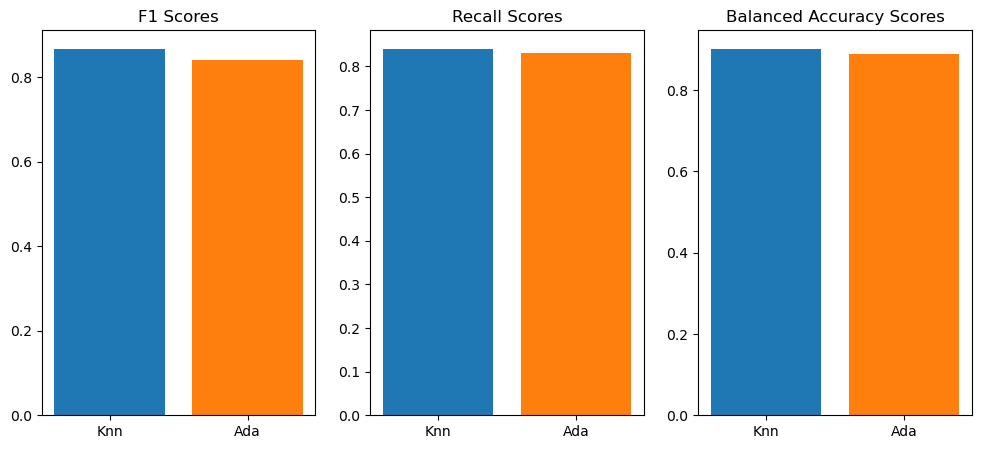

In [39]:
# Plot the different scores for both the KNN and ADA classifiers for ease of comparison

fig, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].bar(0, knn_under_f1_test, label="Knn")
ax[0].bar(1, ada_over_f1_test, label="Ada")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Knn", "Ada"])
ax[0].set_title("F1 Scores")

ax[1].bar(0, knn_under_recall_test, label="Knn")
ax[1].bar(1, ada_over_recall_test, label="Ada")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Knn", "Ada"])
ax[1].set_title("Recall Scores")

ax[2].bar(0, knn_under_test_acc, label="Knn")
ax[2].bar(1, ada_over_test_acc, label="Ada")
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(["Knn", "Ada"])
ax[2].set_title("Balanced Accuracy Scores")

Figure 5. Charts containing F1 scores, Recall scores and Balanced Accuracy scores of the KNN and ADA models side by side

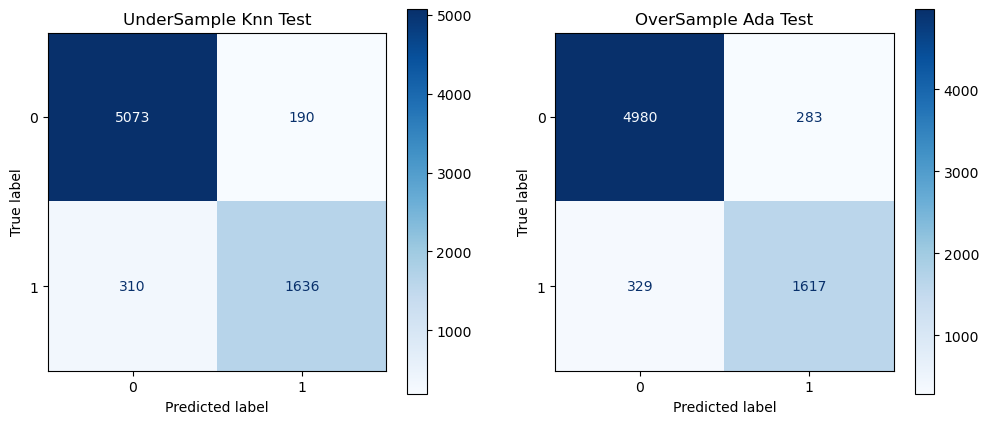

In [41]:
# Plot confusion matrix of KNN and Ada classifiers for ease of comparison on the testing data predictions
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_title("UnderSample Knn Test")
disp_under = ConfusionMatrixDisplay.from_estimator(
    clf_knn_under,
    new_under_test,
    test_labels,
    cmap=plt.cm.Blues,
    ax=ax[0]
)

ax[1].set_title("OverSample Ada Test")
disp_over = ConfusionMatrixDisplay.from_estimator(
    clf_ada_over.best_estimator_,
    test_data,
    test_labels,
    cmap=plt.cm.Blues,
    ax=ax[1]
)

Figure 6. Confusion matrix comparisons for test data from a KNN model trained on undersampled data and an ADA model trained on oversampled data 

### c) Model selection (ROC or other charts)

Knn AUC: 0.9114069131220905
Ada AUC: 0.9145510387922121


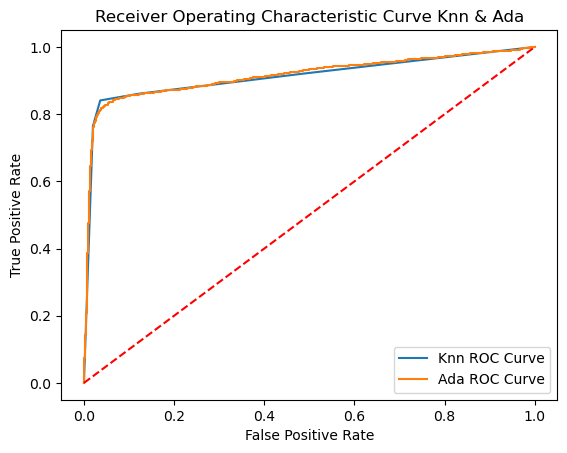

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Return the probabilities of each classifier against each prediction class 
knn_scores = clf_knn_under.predict_proba(new_under_test)[:, 1]
ada_scores = clf_ada_over.predict_proba(test_data)[:, 1]

# Run the roc curve method to achieve the values at each prediction threshold point
knn_fpr, knn_tpr, knn_thresholds = roc_curve(test_labels, knn_scores)
ada_fpr, ada_tpr, ads_thresholds = roc_curve(test_labels, ada_scores)

# Plot the roc curve for both models on the same graph
plt.plot(knn_fpr, knn_tpr, label="Knn ROC Curve")
plt.plot(ada_fpr, ada_tpr, label="Ada ROC Curve")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve Knn & Ada")
plt.legend()

knn_auc_score = roc_auc_score(test_labels, knn_scores)
ada_auc_score = roc_auc_score(test_labels, ada_scores)

print(f"Knn AUC: {knn_auc_score}")
print(f"Ada AUC: {ada_auc_score}")

Figure 7. ROC Curve diagram plotting both KNN (blue line) and ADA (orange line) model rates with a linear line 

F1: 0.9022988932216784, Recall: 0.9022988932216784, Balanced Accuracy: 0.9022988932216784
[[5073  190]
 [ 310 1636]]


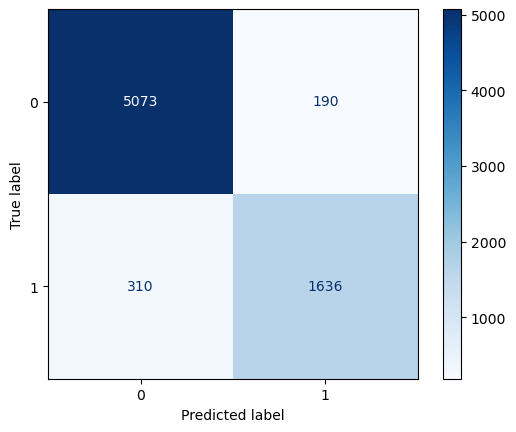

In [46]:
# Test with Knn using a different Threshold to minimise the number of false negatives

# Probabilities for positive class
probabilities = clf_knn_under.predict_proba(new_under_test)[:, 1]
new_threshold = 0.7

new_predictions = np.where(probabilities > new_threshold, 1, 0)

balanced_accuracy_new_preds = balanced_accuracy_score(test_labels, new_predictions)
f1_new_preds = balanced_accuracy_score(test_labels, new_predictions)
recall_new_preds = balanced_accuracy_score(test_labels, new_predictions)

print(f"F1: {f1_new_preds}, Recall: {recall_new_preds}, Balanced Accuracy: {balanced_accuracy_new_preds}")

disp_under = ConfusionMatrixDisplay.from_predictions(
    test_labels,
    new_predictions,
    cmap=plt.cm.Blues
)

conf_matrix = confusion_matrix(test_labels, new_predictions)

print(conf_matrix)

Figure 8. Confusion matrix for KNN model using a decision threshold of 0.7

In [47]:
# Pricing model
combined["AmountOfTotalClaim"] = pd.to_numeric(combined["AmountOfTotalClaim"], errors="coerce")
combined["AmountOfTotalClaim"].fillna(combined["AmountOfTotalClaim"].mean())

# Average for 2.5 month timespan in the dataset
average_claim = combined["AmountOfTotalClaim"].mean()

# Monthly customers
amount_of_claims = combined["AmountOfTotalClaim"].count()

# Yearly customer amount by multiplying by 4.8
yearly_amount_of_claims = amount_of_claims * 4.8

# Total claims from average claim price and yearly number of customer claims
total_claims = average_claim * yearly_amount_of_claims

print(f"Total claims by average: {total_claims}")
gross_profit_required = total_claims * 2
print(f"Gross profit required: {gross_profit_required}")

number_of_customers = yearly_amount_of_claims * 10 # Assuming a 10% claim rate
print(f"Number of customers: {number_of_customers}")
price_per_policy = gross_profit_required/number_of_customers
print(f"Price per policy: {price_per_policy}")

Total claims by average: 7227618191.999999
Gross profit required: 14455236383.999998
Number of customers: 1381728.0
Price per policy: 10461.70909469881


In [111]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(test_labels, knn_under_test_preds)

false_positive_cost = price_per_policy
false_negative_cost = average_claim

false_positives = cf[0][1]
false_negatives = cf[1][0]

customer_loss = false_positives * false_positive_cost
fraud_loss = false_negatives * false_negative_cost

print(f"Customer Loss: {customer_loss}")
print(f"Fraud Loss: {fraud_loss}")

total_loss = customer_loss + fraud_loss

print(f"Total loss: {total_loss}")

true_positives = cf[1][1]

potential_fraud_savings = true_positives * average_claim

net_savings = potential_fraud_savings - (customer_loss + fraud_loss)

print(f"Potential savings from model detecting fraud: {potential_fraud_savings}")
print(f"Net savings: {net_savings}")

Customer Loss: 1987724.727992774
Fraud Loss: 16215649.096783157
Total loss: 18203373.82477593
Potential savings from model detecting fraud: 85576780.39463627
Net savings: 67373406.56986034


## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

The k-nearest Neighbors model (KNN) would be the recommended model from a technical perspective as this model does not require training since it is classified as a lazy learner and delays the process of modeling the training data until the test data is presented. This model compares new datapoints to a number of existing datapoints in the surrounding space and then will use the classifications of these existing points to classify the new data.
(Tan et al, 2019, p410)

While this model type is prone to overfitting, this issue is usually caused by high dimensionality of the data which can be combatted via feature selection such as is used on the proposed model and tuning of the number of neighbors. This reduces the risk of overfitting and allows for the model to still achieve high accuracy rates on both the training and test data. 

KNN models are much more efficient to train than the ADABoostClassifiers consisting of HistGradientBoostingClassifiers as both of these model types are ensembles made up of multiple different models but KNN models defer the computational cost to the prediction phase. Nesting ensembles can help to achieve higher accuracy in complex datasets but also have a high risk of overfitting and much longer training times. 
(Tan et al, 2019, p510-512)

Given these reasons the KNN model would be recommended from a technical perspective as it is both more efficient, less complex, less prone to overfitting once feature selection is applied and the computing cost at the prediction phase is acceptable due to the use of the model not being time critical.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

The KNN model performed better in the balanced accuracy test, F1 test and Recall test than the ADA model (Figure 5). The balanced accuracy of this model reached roughly 90.2% with the ADA model scoring around 88.8% showing that the KNN model was better in classifying both the fraud and non-fraud cases in the test data. 

The Recall score is used to calculate the ability of the model to classify the fraud claims made and is roughly 84.1% in the KNN model compared to 82.3% in the ADA model showing the the KNN model was superior in correctly identifying fraud cases. Similarly, the F1 score which calculates the correct predictions across the entire test set was 86.7% in the KNN model compared to 84.1% in the ADA model which will allow the business to maximise the detection of correct and incorrect fraud claims so customers will be less likely to be falsely accused. 

The confusion matrix (Figure 6) shows that the KNN model outperforms the ADA model in every classification category and would lead to more correct classifications over the entire dataset with less customers being falsely classified as committing fraud and fewer missed fraud cases.

The ROC curve shows that both models are almost equal but that the KNN classifier reaches higher in the top left corner of the curve showing that at some thresholds the knn classifier is performing better than the ADA classifier. Furthermore, the Area Under the Curve (AUC) score is similar in both models showing that the performance in classifying the positive class is similar.  

From the pricing model used, utilising the KNN model would lead to some customer loss and fraud claims being missed due to the overall accuracy being under 100% and could cost up to \\$18203373 in losses but could lead to a potential net savings of \\$67373407 from the correctly classified fraudulent claims which may perform better than the current system in place. The business would also have the option of running this model in tandem with their current fraud system to further decrease potential losses. 

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?

During this report the data preprocessing was successful as the data was cleaned with synonymous and noisy attributes removed, missing values either removed or imputed depending on the circumstance and importance of the attribute, rescaling of the data performed to ensure different value ranges did not impact the models and the class imbalance problem addressed by the use of both oversampling and undersampling to allow for testing on which approach had a better effect on the overall accuracy. 

The two models were also fitted to the data with hyper parameters tuned to allow for a higher accuracy score to be achieved given the data presented. This was done via nested cross validation by the use of the GridSearchCV method which inherently includes 5-fold cross validation when testing parameters.

Furthermore, multiple different metrics such as the F1 score, recall score, balanced accuracy score and ROC curve were analysed to choose the better model regarding the dataset. 

The target accuracy of 95% was not achieved during this project with the highest scoring model having a balanced accuracy of just over 90%. This was iteratively improved throughout the duration of the project but could not be increased further with the current implementations and processing of the dataset. 

The model was also not able to achieve an unbiased error rate as both models had a bias to identify more fraud claims as non-fraudulent which in the case of the KNN model was roughly 63% higher incorrect classification for this class which could lead to the business losing out on these claims. 

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

If this project was performed again different ways to clean and preprocess the data would be explored as the current implementation of these processes may be the cause of the models not being able to achieve the target error rate for the given task. To achieve this multiple different methods of processing the data would be used to try and combine different combinations of these methods to see which would be the best approach.

Furthermore, more hyperparameters for each model type would be checked as this would allow for the potential of better models being tested which could lead to an increase in the overall classification abilities of the models. Along with this more model types being passed into the ADABoostClassifier could allow for different model strategies to be analysed which could lead to a model which can find better patterns in the provided data.

Performing feature selection for the ADA model would also be performed if this project was repeated and more time was available for this very time intensive process. 

### c) Provide a wish list of future work that you would like to do

Future work I would like to do in this project would be to re-examine the data to see if different types of scaling or cleaning would allow for better model performance as this would need to be iteratively tested for each change made to see what affect this had on the models. 

Furthermore, expanding this to test different model types to see if there are other models which could perform better either with the current data or the newly cleaned and scaled data.

I would also like to implement models which can be used to impute the missing data for each of the attributes to see if this could improve the overall usefulness of the data and provide better values for missing data than simple imputing based on averages. This would likely be a bigger undertaking as it would require more models to be built and tested before being able to use the generated data in the current models. 

### d) References

Tan, P.N., Steinbach, M. and Kumar, V., 2019. Introduction to data mining. [Online]. Second Edition. Harlow: Pearson Education Limited. [16th December 2023]. Available from: https://bibliu.com/app/#/view/books/9780273775324/pdf2htmlex/index.html#page_Front%20Cover